In [1]:
!pip install yfinance



In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
stock_symbol = 'ASIANPAINT.NS'

In [4]:
start='2023-04-25'

In [5]:
end='2024-04-25'

In [6]:
stock_data = yf.download(stock_symbol, start , end)
print(stock_data)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-04-25  2891.050049  2901.750000  2864.149902  2898.000000  2873.812256   
2023-04-26  2896.949951  2916.449951  2888.050049  2910.000000  2885.711914   
2023-04-27  2915.500000  2920.000000  2893.850098  2899.949951  2875.745850   
2023-04-28  2919.949951  2919.949951  2846.600098  2902.350098  2878.125977   
2023-05-02  2910.949951  2933.699951  2893.000000  2899.550049  2875.349365   
...                 ...          ...          ...          ...          ...   
2024-04-18  2855.000000  2859.199951  2800.100098  2807.699951  2807.699951   
2024-04-19  2790.000000  2822.100098  2766.149902  2808.550049  2808.550049   
2024-04-22  2846.600098  2846.600098  2814.050049  2841.850098  2841.850098   
2024-04-23  2852.000000  2877.949951  2844.000000  2874.899902  2874.899902   
2024-04-24  2882.949951  2883.100098  2860.000000  2

#  GBM Formula 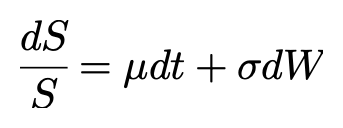 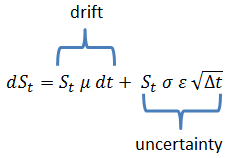

In [7]:

def monte_carlo_simulation(start_price, days, mu, sigma):
    dt = 1
    prices = np.zeros(days)
    prices[0] = start_price
    
    for day in range(1, days):
        drift = mu * dt
        shock = sigma * dt**0.5 *np.random.normal()               # np.random .normal() - Generate a single random number from a normal distribution with mean 0 and standard deviation 1
        price = prices[day - 1] *(1+drift + shock)
        prices[day] = price if price > 0 else 0
    
    return prices

start_price = stock_data['Close'].iloc[-1]

stock_data['Daily Return'] = stock_data['Close'].pct_change()

mu = stock_data['Daily Return'].mean()
sigma = stock_data['Daily Return'].std()

days = 265
simulations = 1000

simulated_prices = np.zeros((simulations, days))
for i in range(simulations):
    simulated_prices[i] = monte_carlo_simulation(start_price, days, mu, sigma)

# PLotting the simulated price 

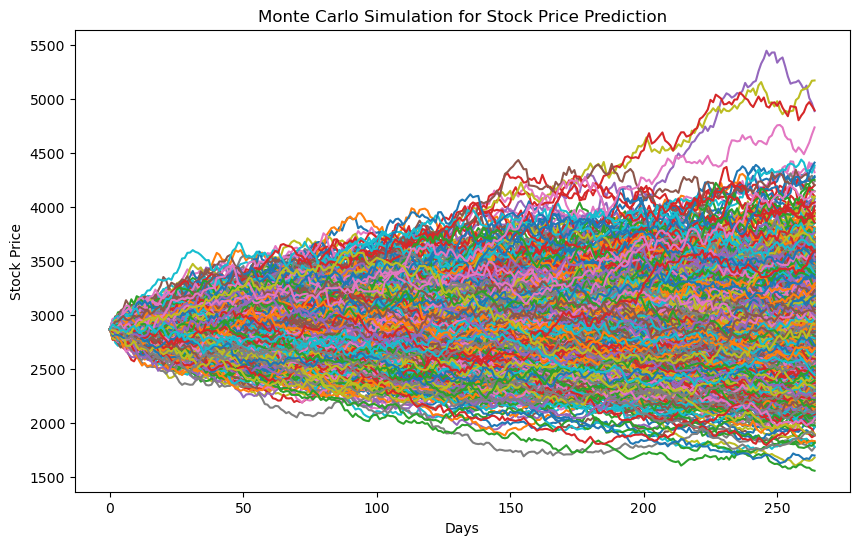

In [8]:
plt.figure(figsize=(10, 6))
for i in range(simulations):
    plt.plot(simulated_prices[i])

plt.title('Monte Carlo Simulation for Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()


## Simualted Price at various percentile over the 265 days

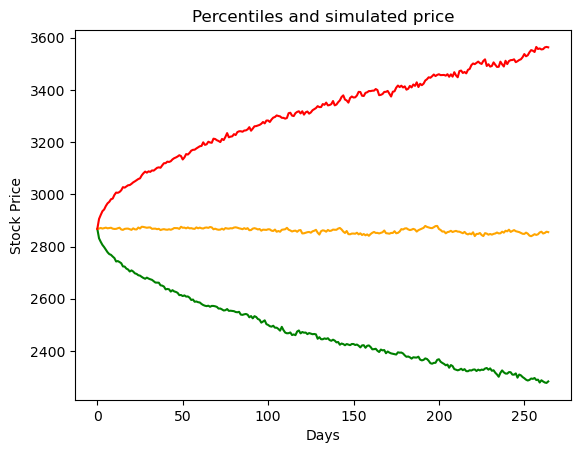

In [9]:
quantiles = np.percentile(simulated_prices, [10, 50, 90], axis=0)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Percentiles and simulated price')

plt.plot(quantiles[0],  color='green', label='10th Percentile')
plt.plot(quantiles[1],  color='orange', label='50th Percentile (Median)')
plt.plot(quantiles[2],  color='red', label='90th Percentile')


Text(0, 0.5, 'Stock Price')

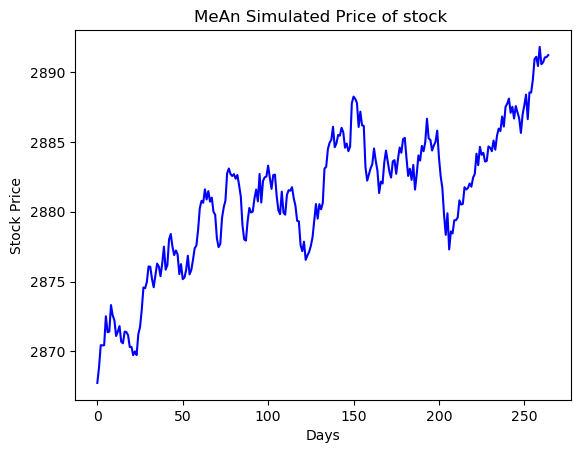

In [10]:
mean_prices = np.mean(simulated_prices, axis=0)
plt.plot(mean_prices, label='Mean', color='blue')
plt.title('MeAn Simulated Price of stock ')
plt.xlabel('Days')
plt.ylabel('Stock Price')

# Plotting PDF (Probability Density Function) 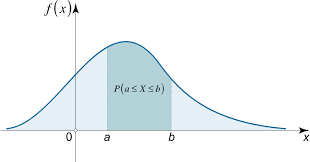

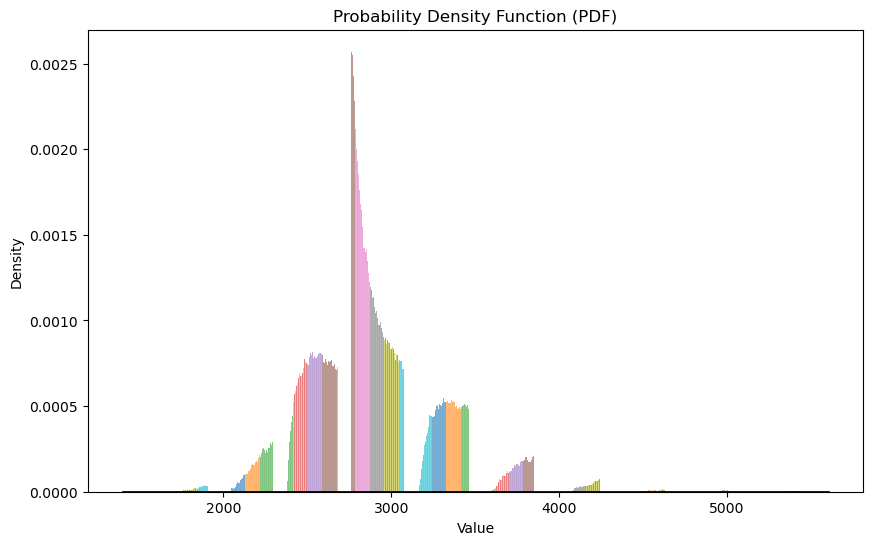

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(simulated_prices, bins=10, density=True, alpha=0.6)  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

# Simulated price at 95% confidence level

In [12]:
confidence_level = 0.95
stock_price_confidence = np.quantile(simulated_prices, confidence_level)
print("Stock price at 95% confidence level is :" ,stock_price_confidence)


Stock price at 95% confidence level is : 3501.2186500972725
